In [1]:
import pandas as pd

In [62]:
df = pd.read_csv('monthly-car-sales.csv')

In [3]:
import matplotlib.pyplot as plt

In [4]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [5]:
df['Month'] = pd.to_datetime(df['Month'])

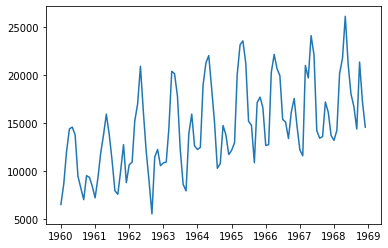

In [6]:
plt.plot(df['Month'], df['Sales'])
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

In [9]:
adfuller(df['Sales'])

(-1.2238127661752862,
 0.6632691049832858,
 12,
 95,
 {'1%': -3.5011373281819504,
  '5%': -2.8924800524857854,
  '10%': -2.5832749307479226},
 1671.1995896872572)

In [10]:
labels = ['ADF Test Stats', 'p-value','Lags Used','Num of observations']
results = adfuller(df['Sales'])
for value, label in zip(results, labels):
    print(label ,value)

ADF Test Stats -1.2238127661752862
p-value 0.6632691049832858
Lags Used 12
Num of observations 95


In [63]:
df['Sales Diff_1'] = df['Sales'] - df['Sales'].shift()

In [64]:
df.head()

,Month,Sales,Sales Diff_1
0,1960-01,6550,NaN
1,1960-02,8728,2178.0
2,1960-03,12026,3298.0
3,1960-04,14395,2369.0
4,1960-05,14587,192.0


In [65]:
df['Sales Diff_Seasonal'] = df['Sales'] - df['Sales'].shift(12)

In [66]:
df.head()

,Month,Sales,Sales Diff_1,Sales Diff_Seasonal
0,1960-01,6550,NaN,NaN
1,1960-02,8728,2178.0,NaN
2,1960-03,12026,3298.0,NaN
3,1960-04,14395,2369.0,NaN
4,1960-05,14587,192.0,NaN


In [67]:
df.tail(10)

,Month,Sales,Sales Diff_1,Sales Diff_Seasonal
98,1968-03,20139,5888.0,-846.0
99,1968-04,21725,1586.0,2033.0
100,1968-05,26099,4374.0,2018.0
101,1968-06,21084,-5015.0,-1030.0
102,1968-07,18024,-3060.0,3804.0
103,1968-08,16722,-1302.0,3288.0
104,1968-09,14385,-2337.0,787.0
105,1968-10,21342,6957.0,4155.0
106,1968-11,17180,-4162.0,1061.0
107,1968-12,14577,-2603.0,864.0


In [68]:
adfuller(df['Sales Diff_Seasonal'].dropna())

(-3.644396602406012,
 0.004966833586579766,
 11,
 84,
 {'1%': -3.510711795769895,
  '5%': -2.8966159448223734,
  '10%': -2.5854823866213152},
 1477.5087214225468)

<AxesSubplot:>

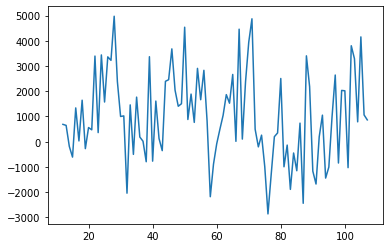

In [69]:
df['Sales Diff_Seasonal'].plot()

In [70]:
df.shape

(108, 4)

In [44]:
from statsmodels.tsa.arima_model import ARIMA

In [72]:
df = df.dropna(axis=0, subset=['Sales Diff_Seasonal'])

In [73]:
df.shape

(96, 4)

In [74]:
# p = 1,d = 1,q = 1
model = ARIMA(df['Sales'], order=(1,0,1))

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fore

In [75]:
model_fit = model.fit()

In [76]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   96
Model:                     ARMA(1, 1)   Log Likelihood                -906.599
Method:                       css-mle   S.D. of innovations           3043.239
Date:                Thu, 31 Dec 2020   AIC                           1821.197
Time:                        11:48:05   BIC                           1831.455
Sample:                             0   HQIC                          1825.343
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.501e+04    905.302     16.582      0.000    1.32e+04    1.68e+04
ar.L1.Sales     0.5568      0.107      5.220      0.000       0.348       0.766
ma.L1.Sales     0.3102      0.107      2.894      0.004       0.100       0.520
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7961           +0.0000j            1.7961            0.0000
MA.1           -3.2236           +0.0000j            3.2236            0.5000
-----------------------------------------------------------------------------
"""

In [80]:
df['forecast'] = model_fit.predict(start=96,end=120,dynamic=True)

<ipython-input-80-ff122b16b3a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['forecast'] = model_fit.predict(start=96,end=120,dynamic=True)


In [81]:
df['forecast']

12              NaN
13              NaN
14              NaN
15              NaN
16              NaN
           ...     
103    15004.931195
104    15007.922716
105    15009.588256
106    15010.515551
107    15011.031826
Name: forecast, Length: 96, dtype: float64

<AxesSubplot:>

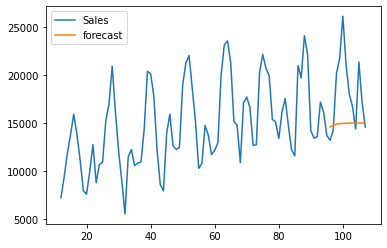

In [82]:
df[['Sales','forecast']].plot()

In [83]:
import statsmodels.api as sm

In [84]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1,0,1), seasonal_order=(1,1,1,12))

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [85]:
results = model.fit()

In [86]:
df['forecast'] = results.predict(start=96,end=120,dynamic=True)

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:>

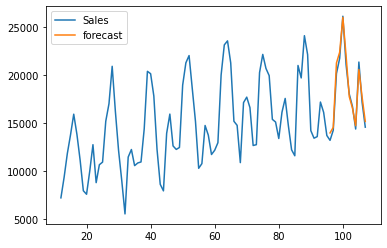

In [87]:
df[['Sales','forecast']].plot()